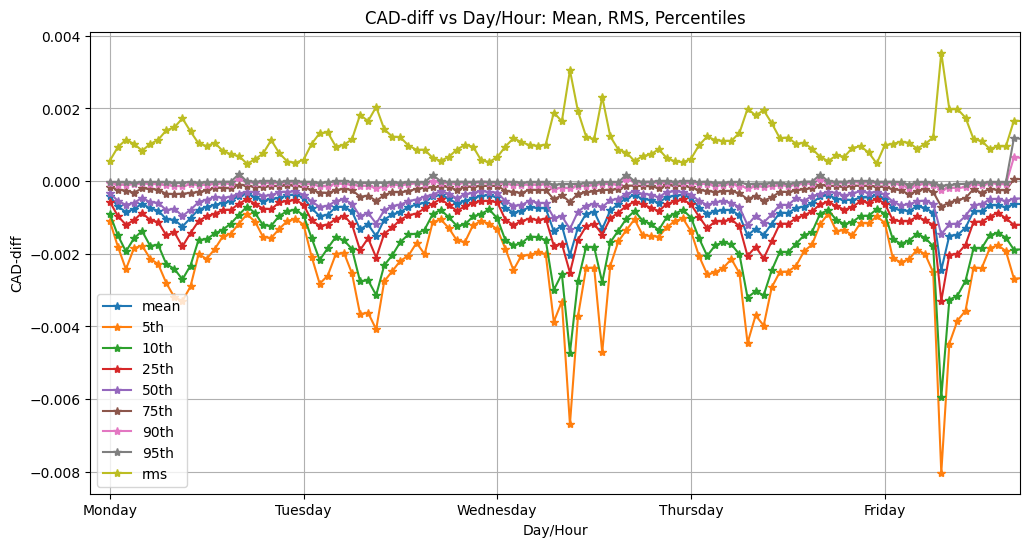

In [34]:
#necessary imports
import joblib
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load pipeline and read og data
load_pipeline = joblib.load('pipeline1.pkl')
data = pd.read_pickle('appml-assignment1-dataset-v2.pkl')

#dict to df
X = data['X']
y = data['y']

#formatting date(dow & hod)
X['date'] = pd.to_datetime(X['date'])
X['day_of_week'] = X['date'].dt.dayofweek
X['hour_of_day'] = X['date'].dt.hour

#run og data through pipeline
X_preprocessed = load_pipeline.transform(X)

#calculate difference
CAD_diff = X['CAD-close'] - y

#new data frame w only date params and CAD-diff
new_df = pd.DataFrame({
    'day_of_week': X['day_of_week'],
    'hour_of_day': X['hour_of_day'],
    'difference': CAD_diff
})

#grouping
gr = new_df.groupby(['day_of_week', 'hour_of_day'])['difference'].agg([
    'mean', lambda x: np.percentile(x, 5), lambda x: np.percentile(x, 10),
    lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 50), lambda x: np.percentile(x, 75),
    lambda x: np.percentile(x, 90), lambda x: np.percentile(x, 95), lambda x: np.sqrt(np.mean(x ** 2))
]).reset_index()

#for legend
gr.columns = ['day_of_week', 'hour_of_day', 'mean', '5th', '10th', '25th', '50th', '75th', '90th', '95th', 'rms']

#plotting
plt.figure(figsize=(12, 6))
statistics = ['mean', '5th', '10th', '25th', '50th', '75th', '90th', '95th', 'rms']
for stat in statistics:
    plt.plot(gr['day_of_week'] + gr['hour_of_day'] / 24, gr[stat], label=stat, marker='*')
plt.xlim(-0.1,4.7)
plt.title('CAD-diff vs Day/Hour: Mean, RMS, Percentiles')
plt.xlabel('Day/Hour')
plt.ylabel('CAD-diff')
plt.xticks(range(5), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.grid(True)
plt.legend()
plt.savefig('cad-change-stats.png')
plt.show()